In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

In [6]:
df=pd.read_csv('/content/breastCancer.csv')
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.shape

(699, 11)

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [21]:
df['bare_nucleoli'].mode()

0    1
Name: bare_nucleoli, dtype: object

In [23]:
df.loc[df['bare_nucleoli']=='?','bare_nucleoli']=1

In [26]:
df['bare_nucleoli']=df['bare_nucleoli'].astype(int)

In [29]:
df.drop('id',axis=1,inplace=True)

In [30]:
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<Axes: >

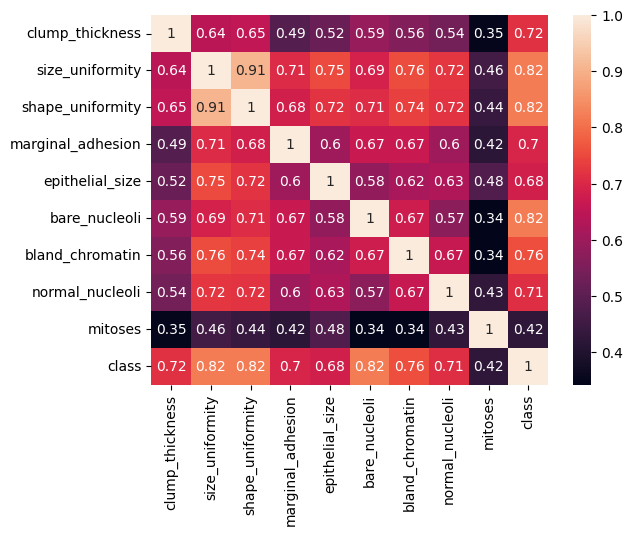

In [32]:
sns.heatmap(df.corr(),annot=True)

<h5> where ths shape_uniformity and size uniformity are highly postively correlated.</h5>
<h5>And also size uniformity and epithelial_size attribute are also positively correlated and then bland_chromatin and size uniformity are positively correlated.</h5>

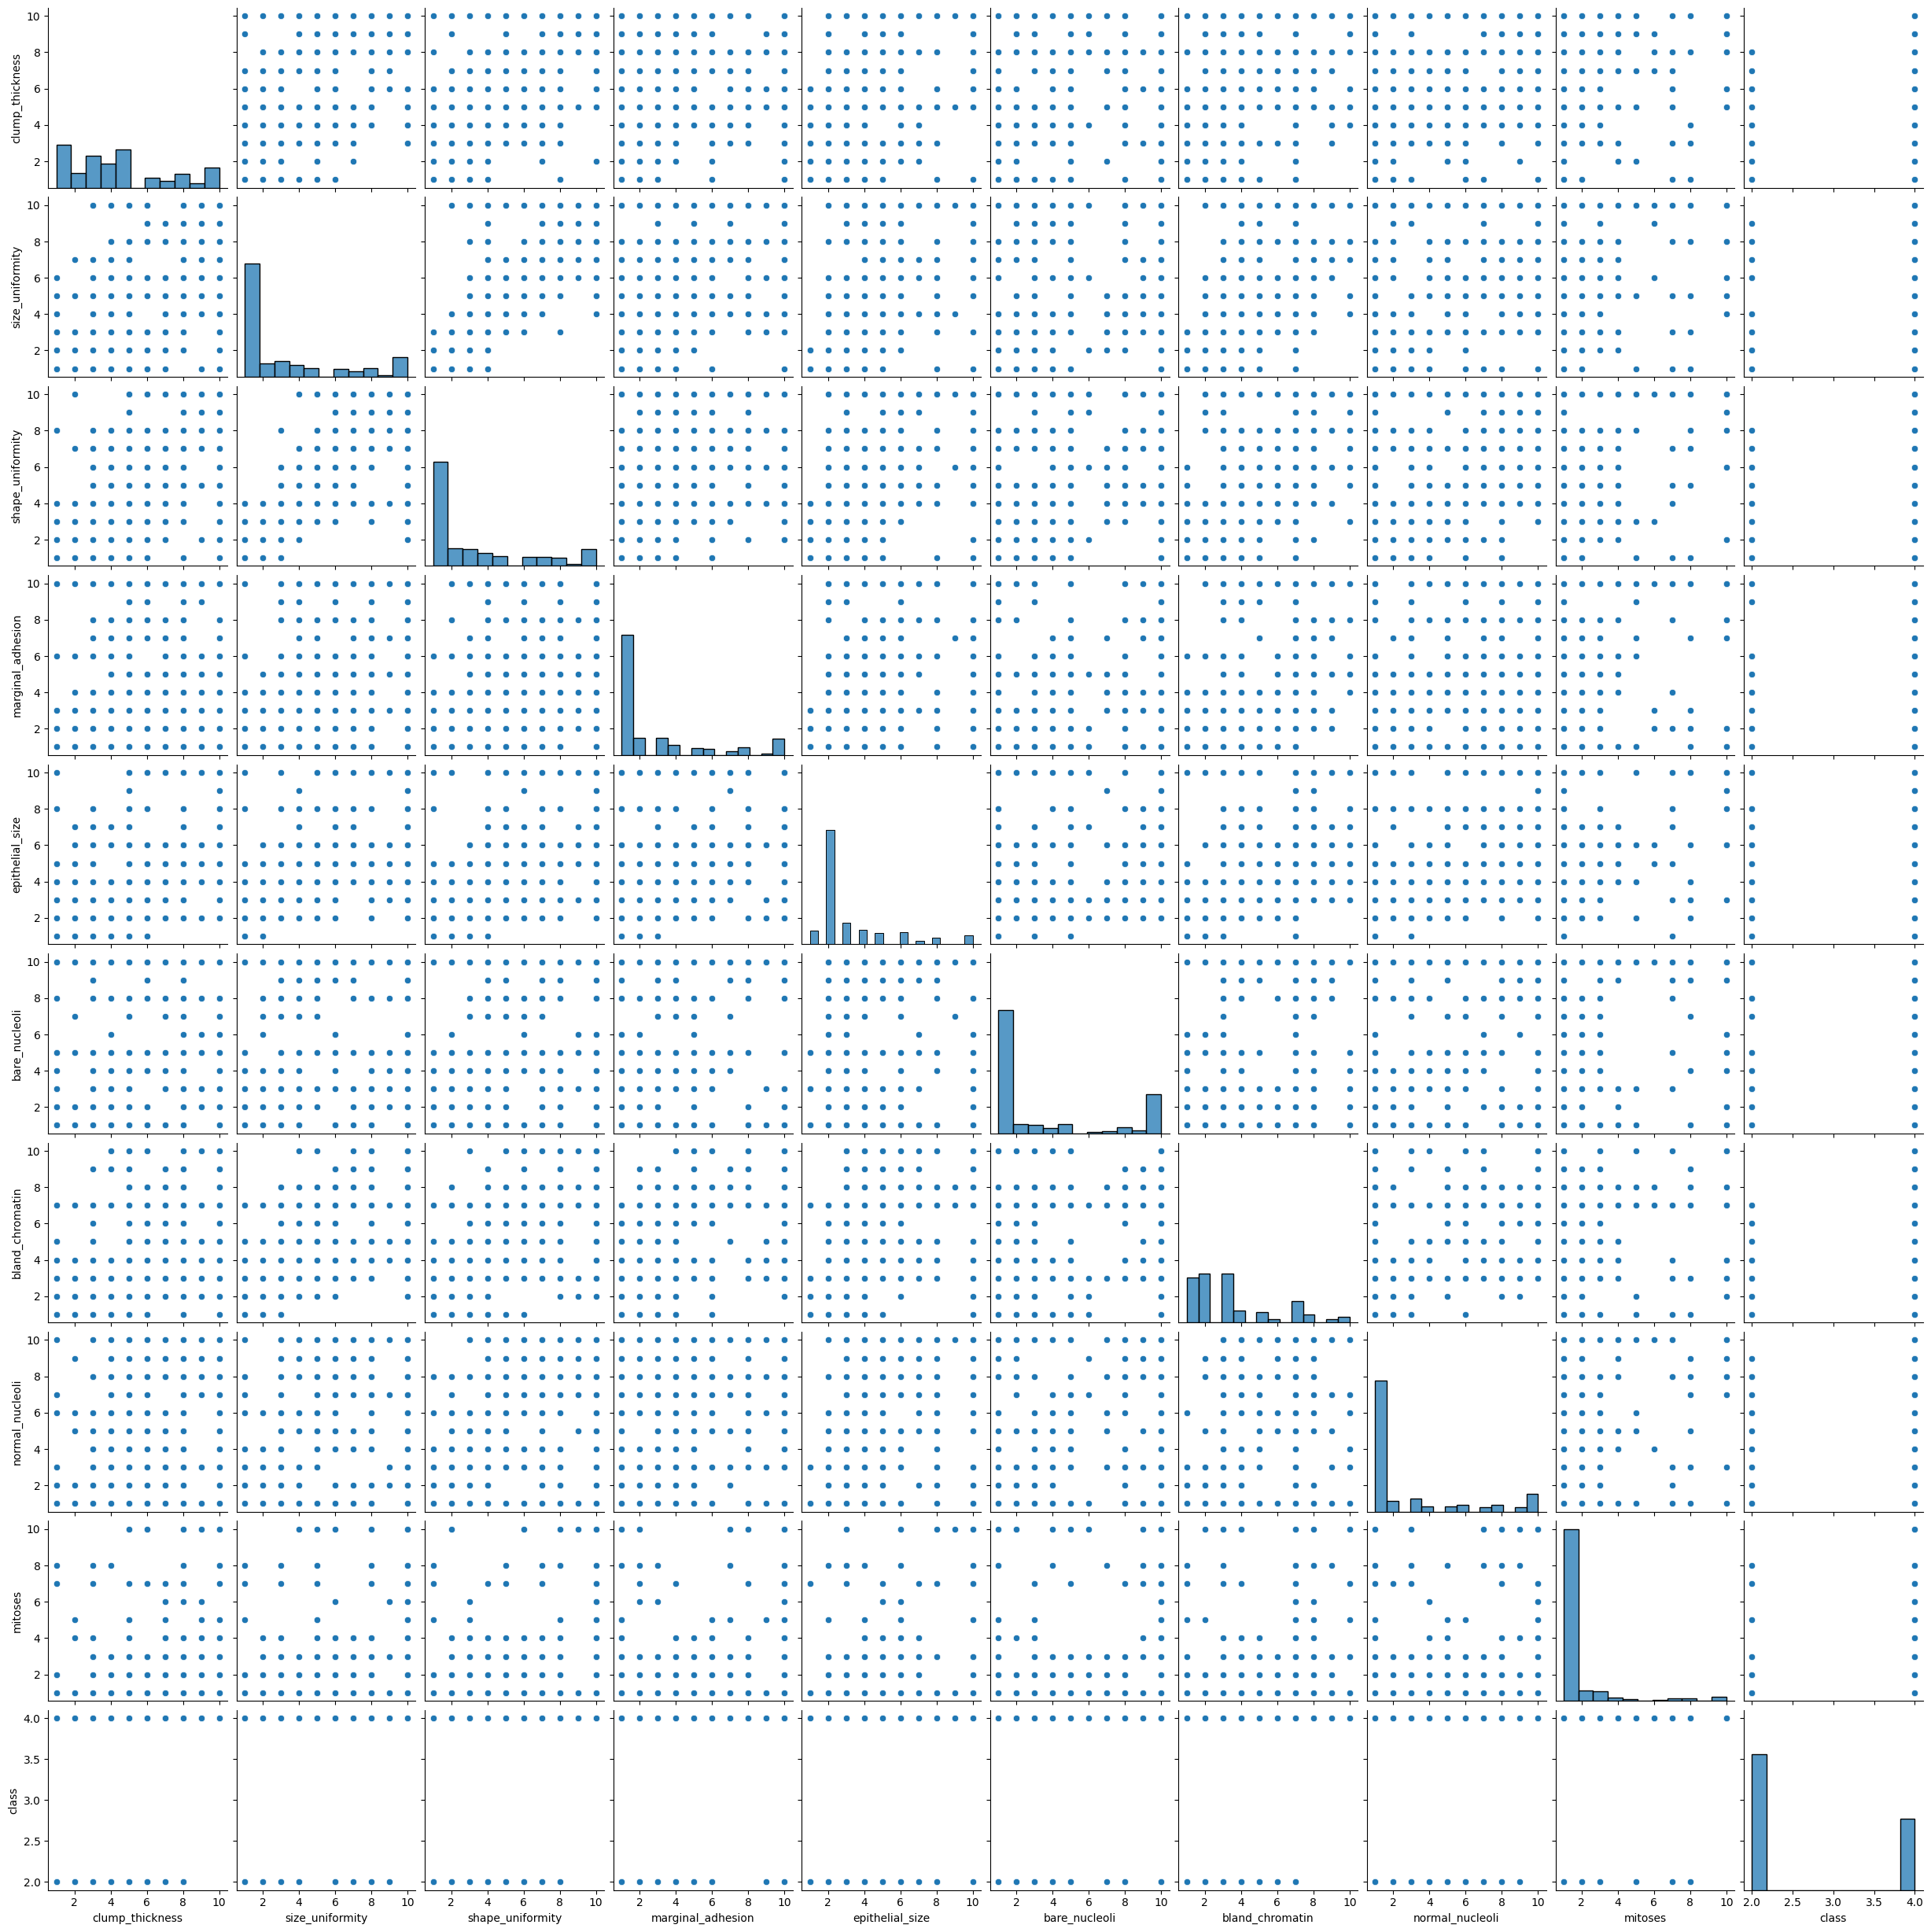

In [33]:
sns.pairplot(df)
plt.show()

In [36]:
# spliting the data
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [38]:
# where 2 means benign(healthy) and 4 means malicious (Cancerous)
x=df.drop('class',axis=1)
y=df['class']
scale=StandardScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,stratify=y,random_state=42)

In [102]:
# Model Building
svm=SVC(kernel='rbf',gamma=0.025, C=3)
svm.fit(x_train,y_train)

SVC(C=3, gamma=0.025)

In [103]:
y_pred=svm.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred,pos_label=4))
print('Precision Score:',precision_score(y_test,y_pred,pos_label=4))
print('Recall Score:',recall_score(y_test,y_pred,pos_label=4))

Accuracy Score: 0.9642857142857143
F1 Score: 0.9484536082474228
Precision Score: 0.9387755102040817
Recall Score: 0.9583333333333334


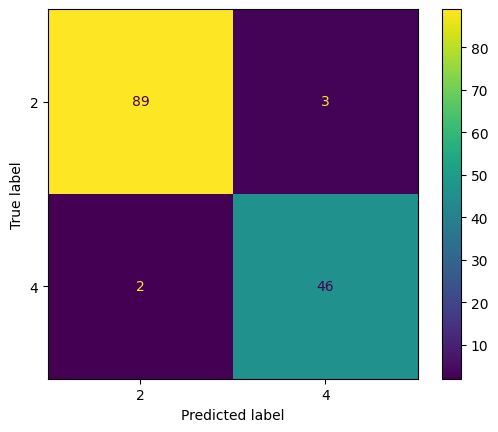

In [93]:
cm=confusion_matrix(y_test,y_pred,labels=svm.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels=svm.classes_)
disp.plot()

In [213]:
rfc=RandomForestClassifier(n_estimators=500,max_depth=5,min_samples_leaf=2,min_samples_split=2,max_features=3)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=2,
                       n_estimators=500)

In [214]:
y_pred=rfc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred,pos_label=4))
print('Precision Score:',precision_score(y_test,y_pred,pos_label=4))
print('Recall Score:',recall_score(y_test,y_pred,pos_label=4))

Accuracy Score: 0.9714285714285714
F1 Score: 0.9591836734693877
Precision Score: 0.94
Recall Score: 0.9791666666666666


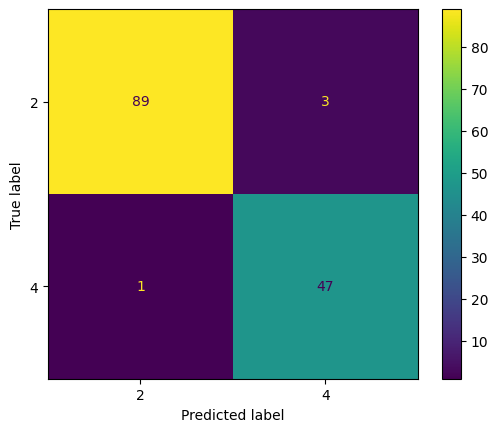

In [215]:
cm=confusion_matrix(y_test,y_pred,labels=rfc.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)
disp.plot()